<a href="https://colab.research.google.com/github/SaulFdz24/Evaluacion/blob/main/Actividad_5(Evaluacion).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Actividad 5 - Evaluación**

###Miguel Saúl Fernández Avalos

###A01707491

##Etapa 1

Aplicar métodos para reemplazar valores nulos y justificar el método aplicado para cada columna o dataframe.

Aplicar métodos (Desviación Estándar o Rango Intercuartílico) para eliminar Outliers de cada dataframe y justificar el método aplicado.

In [90]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
#Cargar archivo csv desde equipo
#from google.colab import files
#files.upload()
#files.upload()
#files.upload()

In [92]:
df= pd.read_csv('California_EUA.csv', encoding = 'unicode_escape')
df2 = pd.read_csv('DF_Mexico.csv')
df3 = pd.read_csv('Girona_España.csv', encoding = 'unicode_escape')

In [93]:
#Corroboramos valores nulos
display(df.info(),df2.info(),df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ï»¿id                                         6936 non-null   float64
 1   listing_url                                   6936 non-null   object 
 2   scrape_id                                     6936 non-null   float64
 3   last_scraped                                  6936 non-null   object 
 4   source                                        6936 non-null   object 
 5   name                                          6936 non-null   object 
 6   description                                   6889 non-null   object 
 7   neighborhood_overview                         4850 non-null   object 
 8   picture_url                                   6936 non-null   object 
 9   host_id                                       6936 non-null   i

None

None

None

Antes de empezar a sustituir nulos se debe eliminar las coumnas compuestas en su totalidad por NAs, ya que ningun método funcionaria porque no se tiene información para ello se usará el método dropna con how=all que significa que se eliminará sólo si todos los datos son nas.

In [94]:
display(df.shape,df2.shape,df3.shape)

(6936, 75)

(24224, 75)

(19655, 75)

In [95]:
df = df.dropna(how = 'all',axis = 1)
df2 = df2.dropna(how = 'all',axis = 1)
df3 = df3.dropna(how = 'all',axis = 1)

display(df.shape,df2.shape,df3.shape)

(6936, 72)

(24224, 71)

(19655, 72)

Con éste método se eliminaron 3 columnas en cada dataset que sólo tenían NAs, en el caso del df2 fueron 4 columnas con sólo nas.

Ahora se continuará con el tratamiento de datos nulos.

Para las columnas numéricas con NAs, éstos se sustituirán por la mediana de los datos ya que de este modo no se afecta tanto la distribución de los datos, y se puede identificar más facilmente que datos solían ser NA, se opta por la mediana en lugar de la media, ya que el valor de la media se puede ver afectado por valores atípicos y con eesto se afectaría la distribución de los datos.

Por su parte las de tipo objeto se sustituirán por el valor posterior y el anterior ya que no se puede realizar otro método mas que estos, se decide realizar los 2 ya que si existen dos nas seguidos la secuencia de reemplazo se afectará y se seguirán teniendo nas.

In [96]:
numeric_cols = df.select_dtypes(include=['int', 'float'])
numeric_cols = list(numeric_cols.columns)
numeric_cols

for i in numeric_cols:
  df[i] = df[i].fillna(round(df[i].median(),2))

numeric_cols2 = df2.select_dtypes(include=['int', 'float'])
numeric_cols2 = list(numeric_cols2.columns)
numeric_cols2

for i in numeric_cols2:
  df2[i] = df2[i].fillna(round(df2[i].median(),2))

numeric_cols3 = df3.select_dtypes(include=['int', 'float'])
numeric_cols3 = list(numeric_cols3.columns)
numeric_cols3

for i in numeric_cols3:
  df3[i] = df3[i].fillna(round(df3[i].median(),2))

display(df[numeric_cols].isnull().sum(),df2[numeric_cols2].isnull().sum(),df3[numeric_cols3].isnull().sum())

<ipython-input-96-aa4d08ad59b4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[i] = df3[i].fillna(round(df3[i].median(),2))
<ipython-input-96-aa4d08ad59b4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[i] = df3[i].fillna(round(df3[i].median(),2))
<ipython-input-96-aa4d08ad59b4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

ï»¿id                                           0
scrape_id                                       0
host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
latitude                                        0
longitude                                       0
accommodates                                    0
bedrooms                                        0
beds                                            0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
availability_30                                 0
availability_60                                 0


id                                              0
scrape_id                                       0
host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
latitude                                        0
longitude                                       0
accommodates                                    0
bedrooms                                        0
beds                                            0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
availability_30                                 0
availability_60                                 0


id                                              0
scrape_id                                       0
host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
latitude                                        0
longitude                                       0
accommodates                                    0
bedrooms                                        0
beds                                            0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
availability_30                                 0
availability_60                                 0


In [97]:
df = df.fillna(method='ffill')
df2 = df2.fillna(method='ffill')
df3 = df3.fillna(method='ffill')

df = df.fillna(method='bfill')
df2 = df2.fillna(method='bfill')
df3 = df3.fillna(method='bfill')

display(df.isnull().sum().sum(),df2.isnull().sum().sum(),df3.isnull().sum().sum())

0

0

0

Con esto se puede ver que ya no existen valores nulos en los datasets.

##Tratamiento valores atípicos

Ahora que se tienen los datasets sin na, se tratarán valores atípicos con el método intercuartil, ya que éste método es más estricto para clasificar los datos como outliers por lo que aunque se pierda más información se tiene una distribución de datos más cercana a donde realmente se tiene información más representativa dentro del dataset, a comparación del método de desviación estándar, donde por la "holgura" que tiene para clasificar los datos como outliers la distribución puede continuar con afectaciones.

In [98]:
y = df[numeric_cols]

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior = percentile75 + 1.5*iqr
Limite_Inferior = percentile25 - 1.5*iqr

data_clean1 = y[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df = df.drop(numeric_cols[1:], axis =1)
df_1 = pd.merge(df, data_clean1)
df_1

,ï»¿id,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958.0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,https://www.airbnb.com/users/show/1169,Holly,...,4.92,4.95,4.88,4.98,4.76,1.0,1.0,0.0,0.0,2.31
1,5858.0,https://www.airbnb.com/rooms/5858,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,https://www.airbnb.com/users/show/8904,Philip And Tania,...,4.87,4.89,4.85,4.77,4.68,1.0,1.0,0.0,0.0,0.66
2,8142.0,https://www.airbnb.com/rooms/8142,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,https://www.airbnb.com/users/show/21994,Aaron,...,NaN,NaN,4.78,4.67,4.67,13.0,0.0,NaN,0.0,0.09
3,8339.0,https://www.airbnb.com/rooms/8339,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/24215,Rosy,...,5.00,4.94,5.00,4.94,4.75,2.0,2.0,0.0,0.0,0.17
4,8739.0,https://www.airbnb.com/rooms/8739,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,https://www.airbnb.com/users/show/7149,Ivan & Wendy,...,4.94,4.95,4.96,4.93,4.74,2.0,0.0,2.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5358,52859106.0,https://www.airbnb.com/rooms/52859106,06/03/2023,city scrape,The Addison by Kasa | Traditional Queen Studio,Have an unforgettable experience living like a...,Pacific Heights is one of the most high-end an...,https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/88566861,Kasa,...,4.90,4.80,4.80,5.00,4.70,17.0,NaN,NaN,0.0,0.63
5359,52859379.0,https://www.airbnb.com/rooms/52859379,06/03/2023,city scrape,The Addison by Kasa | Premium Queen Loft,Have an unforgettable experience living like a...,Pacific Heights is one of the most high-end an...,https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/88566861,Kasa,...,4.71,NaN,NaN,4.86,4.43,17.0,NaN,NaN,0.0,0.88
5360,52861914.0,https://www.airbnb.com/rooms/52861914,06/03/2023,city scrape,Cheerful 5-bedroom home in downtown San Francisco,Your family will be close to everything when y...,Pacific Heights is one of the most high-end an...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/427991063,Tripa,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,0.08
5361,52880170.0,https://www.airbnb.com/rooms/52880170,06/03/2023,city scrape,Casa Divisadero! Penthouse + Deck in Best Loca...,"Large 2 bedroom, 2 bathroom apartment in the h...",Pacific Heights is one of the most high-end an...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/95425780,Jules,...,4.91,5.00,4.91,4.95,4.95,1.0,1.0,0.0,0.0,1.47


In [99]:
y = df2[numeric_cols2]

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior = percentile75 + 1.5*iqr
Limite_Inferior = percentile25 - 1.5*iqr

data_clean2 = y[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df2 = df2.drop(numeric_cols2[1:], axis =1)
df_2 = pd.merge(df2, data_clean2)
df_2

,id,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638,https://www.airbnb.com/rooms/2056638,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/28353712/4379...,https://www.airbnb.com/users/show/10531228,Maria,...,4.95,5.00,4.95,5.00,4.86,3.0,3.0,0.0,0.0,0.19
1,2072354,https://www.airbnb.com/rooms/2072354,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,https://www.airbnb.com/users/show/16840050,Mónica,...,4.88,4.93,5.00,4.95,4.84,2.0,2.0,0.0,0.0,0.54
2,696037,https://www.airbnb.com/rooms/696037,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,...,4.71,4.92,4.92,NaN,4.71,3.0,3.0,0.0,0.0,0.31
3,35797,https://www.airbnb.com/rooms/35797,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,...,4.87,4.93,4.93,4.94,4.82,1.0,1.0,0.0,0.0,1.14
4,44616,https://www.airbnb.com/rooms/44616,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,"Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,...,4.70,4.87,4.78,4.98,4.48,12.0,3.0,2.0,0.0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,853923589855678923,https://www.airbnb.com/rooms/853923589855678923,2023-03-30,city scrape,Rincón Mexico lindo!,Este lugar tiene una ubicación estratégica: ll...,En el corazón de la Condesa,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/488030249,Ana,...,4.87,4.93,4.93,4.94,4.82,2.0,2.0,0.0,0.0,1.14
24220,853966732274073000,https://www.airbnb.com/rooms/853966732274073000,2023-03-29,city scrape,Departamento en zona diamante.,"Ubicado en zona diamante, junto al aeropuerto,...",En el corazón de la Condesa,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/506816029,Jacqueline Vivian,...,4.87,4.93,4.93,4.94,4.82,1.0,1.0,0.0,0.0,1.14
24221,854225071295768399,https://www.airbnb.com/rooms/854225071295768399,2023-03-29,city scrape,Habitación privada en magnífica casa,Relájate en este espacio muy tranquilo y elega...,En el corazón de la Condesa,https://a0.muscache.com/pictures/db71951a-8696...,https://www.airbnb.com/users/show/154670560,Aroa,...,4.87,4.93,4.93,4.94,4.82,1.0,0.0,1.0,0.0,1.14
24222,854247693069190865,https://www.airbnb.com/rooms/854247693069190865,2023-03-30,city scrape,Espacioso y luminoso loft - Roma,What else does it come with?<br />- WIFI 100MB...,En el corazón de la Condesa,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/7799414,Tiane,...,4.87,4.93,4.93,4.94,4.82,13.0,13.0,0.0,0.0,1.14


In [100]:
y = df3[numeric_cols3]

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior = percentile75 + 1.5*iqr
Limite_Inferior = percentile25 - 1.5*iqr

data_clean3 = y[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df3 = df3.drop(numeric_cols3[1:], axis =1)
df_3 = pd.merge(df3, data_clean3)
df_3

,id,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.455100e+04,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,https://www.airbnb.com/users/show/57237,Mun,...,4.94,4.89,4.91,4.63,4.74,1.0,0.0,NaN,0.0,0.37
1,1.205757e+06,https://www.airbnb.com/rooms/1205757,31/03/2023,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,<b>The space</b><br />HabitaciÃ³n confortable ...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,https://www.airbnb.com/users/show/6586355,Montse,...,4.85,4.85,4.91,4.69,4.80,1.0,0.0,NaN,0.0,0.51
2,1.212820e+06,https://www.airbnb.com/rooms/1212820,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/18245529/0886...,https://www.airbnb.com/users/show/6620645,Myriam,...,4.31,4.81,4.76,4.74,4.32,2.0,2.0,0.0,0.0,0.62
3,7.516380e+05,https://www.airbnb.com/rooms/751638,31/03/2023,city scrape,Room Limon - Casa Pati de lÂ´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276178/98d1...,https://www.airbnb.com/users/show/3680160,Roberto,...,4.50,4.86,5.00,4.63,4.50,6.0,1.0,NaN,0.0,0.08
4,4.134200e+04,https://www.airbnb.com/rooms/41342,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,https://www.airbnb.com/users/show/180072,Marisa,...,4.82,4.73,4.73,4.91,4.36,1.0,1.0,0.0,0.0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21988,8.583870e+17,https://www.airbnb.com/rooms/858386613168601750,01/04/2023,city scrape,"Casa La Chumbera, Begur, Costa Brava",Individual house located at the urbanization '...,The Mas Tomasi urbanization is located in Maso...,https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/26281633,MÂª Dolors,...,4.74,4.89,4.91,4.86,4.60,34.0,34.0,0.0,0.0,0.26
21989,8.583960e+17,https://www.airbnb.com/rooms/858396134121337855,01/04/2023,city scrape,Playa a 2 minutos,"MagnÃ­fico piso para pasar vacaciones,dispone ...",The Mas Tomasi urbanization is located in Maso...,https://a0.muscache.com/pictures/6351279f-294b...,https://www.airbnb.com/users/show/444428600,Alina,...,4.74,4.89,4.91,4.86,4.60,1.0,1.0,0.0,0.0,0.26
21990,8.584110e+17,https://www.airbnb.com/rooms/858410917126332945,01/04/2023,city scrape,Apartamento cÃ©ntrico,"EstÃ¡ compuesto de dos habitaciones, una de ma...",The Mas Tomasi urbanization is located in Maso...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/491503593,Administracions Saturno,...,4.74,4.89,4.91,4.86,4.60,9.0,9.0,0.0,0.0,0.26
21991,8.584180e+17,https://www.airbnb.com/rooms/858418062773719271,01/04/2023,city scrape,"Apto a 5 min de la playa, Platja d'Aro",Cozy apartment for 4 people. Perfect to spend ...,The Mas Tomasi urbanization is located in Maso...,https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/389605038,Winahost,...,4.74,4.89,4.91,4.86,4.60,54.0,54.0,0.0,0.0,0.26


Simplemente por precaución para mantener el dataset sin valores nulos se aplicará el método bfill.

In [101]:
df_1 = df_1.fillna(method='bfill')
df_2 = df_2.fillna(method='bfill')
df_3 = df_3.fillna(method='bfill')

display(df_1.isnull().sum().sum(),df_2.isnull().sum().sum(),df_3.isnull().sum().sum())

0

0

0

In [102]:
df_1.to_csv("california.csv")
df_2.to_csv("Df.csv")
df_3.to_csv("girona.csv")

from google.colab import files 
files.download("california.csv")
files.download("Df.csv")
files.download("girona.csv")

'df_1.to_csv("california.csv")\ndf_2.to_csv("Df.csv")\ndf_3.to_csv("girona.csv")\n\nfrom google.colab import files \nfiles.download("california.csv")\nfiles.download("Df.csv")\nfiles.download("girona.csv")'

## Etapa 2 - Filtros

Obtener los registros que cumplan las siguientes condiciones para cada dataframe:

a) host_acceptance_rate> 50%

b) Sólo los registros con categoría “superhost”

c) Los registros que no hallan verificado identidad “ not identity_verified”

d) Los registro cuyo property_type = “Private room” y “Hotel room”

e) Los registros que cuenten con bathroom > 1

f) Los registros cuyo precio sea mayor de $10,000 y que sean de tipo “Entire home”

g) Los registros cuyo review_scores_cleanliness > 4.5

h) Los registros cuyo review_scores_value > 4.9

i) Los registros cuya availability_365< 100

j) Los registros cuya host_response_time sea “within an hour”

In [103]:
df_1.price= df_1.price.replace({'\$':''}, regex = True)
df_1.price= df_1.price.replace({'\,':''}, regex = True)
df_1['price'] = df_1['price'].astype(float)

df_1.host_acceptance_rate= df_1.host_acceptance_rate.replace({'%':''}, regex = True)
df_1['host_acceptance_rate'] = df_1['host_acceptance_rate'].astype(float)

filtro1_cal = df_1[(df_1['host_acceptance_rate'] > 50.)]
filtro2_cal = df_1[(df_1['host_is_superhost'] == 't')]
filtro3_cal = df_1[(df_1['host_identity_verified'] == 'f')]
filtro4_cal = df_1[(df_1['property_type'] == 'Room in hotel') | (df_1['property_type'] == 'Private room')]
filtro5_cal = df_1[(df_1['bathrooms_text'] != '1 bath') & (df_1['bathrooms_text'] != '1 private bath') & (df_1['bathrooms_text'] != 'Half-bath') & (df_1['bathrooms_text'] != '1 shared bath') & (df_1['bathrooms_text'] != 'Shared half-bath') & (df_1['bathrooms_text'] != '0 shared baths') & (df_1['bathrooms_text'] != 'Private half-bath') & (df_1['bathrooms_text'] != '1 private bath') & (df_1['bathrooms_text'] != '0 baths')]
filtro6_cal = df_1[(df_1['price'] > 10000) & (df_1['property_type'] == 'Entire home')]
filtro7_cal = df_1[(df_1['review_scores_cleanliness'] > 4.5)]
filtro8_cal = df_1[(df_1['review_scores_value'] > 4.9)]
filtro9_cal = df_1[(df_1['availability_365'] < 100)]
filtro10_cal = df_1[(df_1['host_response_time'] == 'within an hour')]

In [104]:
df_2.price= df_2.price.replace({'\$':''}, regex = True)
df_2.price= df_2.price.replace({'\,':''}, regex = True)
df_2['price'] = df_2['price'].astype(float)

df_2.host_acceptance_rate= df_2.host_acceptance_rate.replace({'%':''}, regex = True)
df_2['host_acceptance_rate'] = df_2['host_acceptance_rate'].astype(float)

filtro1_df = df_2[(df_2['host_acceptance_rate'] > 50.)]
filtro2_df = df_2[(df_2['host_is_superhost'] == 't')]
filtro3_df = df_2[(df_2['host_identity_verified'] == 'f')]
filtro4_df = df_2[(df_2['property_type'] == 'Room in hotel') | (df_2['property_type'] == 'Private room')]
filtro5_df = df_2[(df_2['bathrooms_text'] != '1 bath') & (df_2['bathrooms_text'] != '1 private bath') & (df_2['bathrooms_text'] != 'Half-bath') & (df_2['bathrooms_text'] != '1 shared bath') & (df_2['bathrooms_text'] != 'Shared half-bath') & (df_2['bathrooms_text'] != '0 shared baths') & (df_2['bathrooms_text'] != 'Private half-bath') & (df_2['bathrooms_text'] != '1 private bath') & (df_2['bathrooms_text'] != '0 baths')]
filtro6_df = df_2[(df_2['price'] > 10000) & (df_2['property_type'] == 'Entire home')]
filtro7_df = df_2[(df_2['review_scores_cleanliness'] > 4.5)]
filtro8_df = df_2[(df_2['review_scores_value'] > 4.9)]
filtro9_df = df_2[(df_2['availability_365'] < 100)]
filtro10_df = df_2[(df_2['host_response_time'] == 'within an hour')]

In [105]:
df_3.price= df_3.price.replace({'\$':''}, regex = True)
df_3.price= df_3.price.replace({'\,':''}, regex = True)
df_3['price'] = df_3['price'].astype(float)

df_3.host_acceptance_rate= df_3.host_acceptance_rate.replace({'%':''}, regex = True)
df_3['host_acceptance_rate'] = df_3['host_acceptance_rate'].astype(float)

filtro1_gir = df_3[(df_3['host_acceptance_rate'] > 50.)]
filtro2_gir = df_3[(df_3['host_is_superhost'] == 't')]
filtro3_gir = df_3[(df_3['host_identity_verified'] == 'f')]
filtro4_gir = df_3[(df_3['property_type'] == 'Room in hotel') | (df_3['property_type'] == 'Private room')]
filtro5_gir = df_3[(df_3['bathrooms_text'] != '1 bath') & (df_3['bathrooms_text'] != '1 private bath') & (df_3['bathrooms_text'] != 'Half-bath') & (df_3['bathrooms_text'] != '1 shared bath') & (df_3['bathrooms_text'] != 'Shared half-bath') & (df_3['bathrooms_text'] != '0 shared baths') & (df_3['bathrooms_text'] != 'Private half-bath') & (df_3['bathrooms_text'] != '1 private bath') & (df_3['bathrooms_text'] != '0 baths')]
filtro6_gir = df_3[(df_3['price'] > 10000) & (df_3['property_type'] == 'Entire home')]
filtro7_gir = df_3[(df_3['review_scores_cleanliness'] > 4.5)]
filtro8_gir = df_3[(df_3['review_scores_value'] > 4.9)]
filtro9_gir = df_3[(df_3['availability_365'] < 100)]
filtro10_gir = df_3[(df_3['host_response_time'] == 'within an hour')]

#Etapa 3 - Visualización de datos

In [106]:
!pip install numpy pandas matplotlib seaborn
!pip install funpymodeling

from funpymodeling.exploratory import freq_tbl 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:
#Para host_response_time

tabla1_cal= freq_tbl(df_1['host_response_time'])
tabla1_cal

tabla1_cal_index= tabla1_cal.set_index('host_response_time')
tabla1_cal_index

tabla1_Df= freq_tbl(df_2['host_response_time'])
tabla1_Df

tabla1_Df_index= tabla1_Df.set_index('host_response_time')
tabla1_Df_index

tabla1_gir= freq_tbl(df_3['host_response_time'])
tabla1_gir

tabla1_gir_index= tabla1_gir.set_index('host_response_time')
tabla1_gir_index

display(tabla1_cal_index, tabla1_Df_index, tabla1_gir_index)

,frequency,percentage,cumulative_perc
host_response_time,,,
within an hour,3713,0.692336,0.692336
within a few hours,1064,0.198396,0.890733
within a day,446,0.083162,0.973895
a few days or more,140,0.026105,1.000000


,frequency,percentage,cumulative_perc
host_response_time,,,
within an hour,19399,0.800817,0.800817
within a few hours,2269,0.093667,0.894485
within a day,1709,0.070550,0.965035
a few days or more,847,0.034965,1.000000


,frequency,percentage,cumulative_perc
host_response_time,,,
within an hour,15466,0.703224,0.703224
within a few hours,3221,0.146456,0.849679
within a day,2831,0.128723,0.978402
a few days or more,475,0.021598,1.000000


In [108]:
#Para host_identity_verified

tabla2_cal= freq_tbl(df_1['host_identity_verified'])
tabla2_cal

tabla2_cal_index= tabla2_cal.set_index('host_identity_verified')
tabla2_cal_index

tabla2_Df= freq_tbl(df_2['host_identity_verified'])
tabla2_Df

tabla2_Df_index= tabla2_Df.set_index('host_identity_verified')
tabla2_Df_index

tabla2_gir= freq_tbl(df_3['host_identity_verified'])
tabla2_gir

tabla2_gir_index= tabla2_gir.set_index('host_identity_verified')
tabla2_gir_index

display(tabla2_cal_index, tabla2_Df_index, tabla2_gir_index)

,frequency,percentage,cumulative_perc
host_identity_verified,,,
t,4704,0.877121,0.877121
f,659,0.122879,1.000000


,frequency,percentage,cumulative_perc
host_identity_verified,,,
t,22301,0.920616,0.920616
f,1923,0.079384,1.000000


,frequency,percentage,cumulative_perc
host_identity_verified,,,
t,19582,0.890374,0.890374
f,2411,0.109626,1.000000


In [109]:
#Para property_type

tabla3_cal= freq_tbl(df_1['property_type'])
tabla3_cal

tabla3_cal_index= tabla3_cal.set_index('property_type')
tabla3_cal_index

tabla3_Df= freq_tbl(df_2['property_type'])
tabla3_Df

tabla3_Df_index= tabla3_Df.set_index('property_type')
tabla3_Df_index

tabla3_gir= freq_tbl(df_3['property_type'])
tabla3_gir

tabla3_gir_index= tabla3_gir.set_index('property_type')
tabla3_gir_index

display(tabla3_cal_index, tabla3_Df_index, tabla3_gir_index)

,frequency,percentage,cumulative_perc
property_type,,,
Entire rental unit,1518,0.283051,0.283051
Private room in home,664,0.123811,0.406862
Entire home,625,0.116539,0.523401
Entire condo,560,0.104419,0.627820
Entire guest suite,405,0.075517,0.703338
Private room in rental unit,370,0.068991,0.772329
Room in boutique hotel,326,0.060787,0.833116
Room in hotel,160,0.029834,0.862950
Private room in condo,153,0.028529,0.891479


,frequency,percentage,cumulative_perc
property_type,,,
Entire rental unit,8145,0.336237,0.336237
Entire condo,3363,0.138829,0.475066
Private room in rental unit,2860,0.118065,0.593131
Private room in home,2009,0.082934,0.676065
Entire loft,1584,0.065390,0.741455
...,...,...,...
Entire in-law,1,0.000041,0.999835
Private room in barn,1,0.000041,0.999876
Shared room in tiny home,1,0.000041,0.999917


,frequency,percentage,cumulative_perc
property_type,,,
Entire rental unit,10738,0.488246,0.488246
Entire home,4227,0.192198,0.680444
Entire villa,1963,0.089256,0.769699
Entire condo,1409,0.064066,0.833765
Entire cottage,572,0.026008,0.859774
...,...,...,...
Floor,1,0.000045,0.999818
Shared room in cottage,1,0.000045,0.999864
Shared room in nature lodge,1,0.000045,0.999909


In [110]:
#Para review_scores_cleanliness

tabla4_cal= df_1['review_scores_cleanliness'].value_counts()
tabla4_cal

tabla4_Df= df_2['review_scores_cleanliness'].value_counts()
tabla4_Df

tabla4_gir= df_2['review_scores_cleanliness'].value_counts()
tabla4_gir

display(tabla4_cal, tabla4_Df, tabla4_gir)

5.00    1306
4.91     918
4.96     147
4.95     145
4.94     144
4.98     142
4.50     142
4.97     142
4.92     123
4.75     117
4.67     117
4.88     114
4.93     112
4.83     108
4.86     108
4.90     105
4.89     102
4.80      97
4.99      76
4.85      67
4.78      64
4.71      57
4.84      51
4.82      48
4.81      45
4.87      44
4.60      42
4.79      40
4.74      38
4.63      38
4.77      37
4.70      37
4.69      35
4.73      35
4.64      34
4.76      32
4.72      31
4.57      30
4.53      28
4.62      24
4.65      24
4.61      23
4.47      23
4.59      23
4.56      20
4.58      20
4.68      18
4.54      14
4.52      12
4.48      12
4.46      11
4.51      11
4.66      10
4.49      10
4.55      10
Name: review_scores_cleanliness, dtype: int64

5.00    5940
4.87    4296
4.88     607
4.67     557
4.89     552
4.83     548
4.92     540
4.90     530
4.50     528
4.75     528
4.86     523
4.94     501
4.93     479
4.80     463
4.91     460
4.95     418
4.96     392
4.85     366
4.82     365
4.97     337
4.78     331
4.84     315
4.79     308
4.81     282
4.71     262
4.98     259
4.76     237
4.77     234
4.73     223
4.70     219
4.60     200
4.74     195
4.69     173
4.63     171
4.72     160
4.57     146
4.68     138
4.65     133
4.64     126
4.62      98
4.58      95
4.56      95
4.55      87
4.66      84
4.53      82
4.59      76
4.44      76
4.61      74
4.99      73
4.45      55
4.54      50
4.46      50
4.52      46
4.48      43
4.47      42
4.51      29
4.49      27
Name: review_scores_cleanliness, dtype: int64

5.00    5940
4.87    4296
4.88     607
4.67     557
4.89     552
4.83     548
4.92     540
4.90     530
4.50     528
4.75     528
4.86     523
4.94     501
4.93     479
4.80     463
4.91     460
4.95     418
4.96     392
4.85     366
4.82     365
4.97     337
4.78     331
4.84     315
4.79     308
4.81     282
4.71     262
4.98     259
4.76     237
4.77     234
4.73     223
4.70     219
4.60     200
4.74     195
4.69     173
4.63     171
4.72     160
4.57     146
4.68     138
4.65     133
4.64     126
4.62      98
4.58      95
4.56      95
4.55      87
4.66      84
4.53      82
4.59      76
4.44      76
4.61      74
4.99      73
4.45      55
4.54      50
4.46      50
4.52      46
4.48      43
4.47      42
4.51      29
4.49      27
Name: review_scores_cleanliness, dtype: int64

In [111]:
#Para review_scores_cleanliness

tabla5_cal= df_1['review_scores_value'].value_counts()
tabla5_cal

tabla5_Df= df_2['review_scores_value'].value_counts()
tabla5_Df

tabla5_gir= df_2['review_scores_value'].value_counts()
tabla5_gir

display(tabla5_cal, tabla5_Df, tabla5_gir)

4.76    894
5.00    785
4.50    206
4.67    190
4.80    157
       ... 
4.45      8
4.98      7
4.34      5
4.39      4
4.37      3
Name: review_scores_value, Length: 66, dtype: int64

5.00    4743
4.82    4367
4.67     669
4.50     635
4.83     610
        ... 
4.51      28
4.39      26
4.35      25
4.37      20
4.99      17
Name: review_scores_value, Length: 66, dtype: int64

5.00    4743
4.82    4367
4.67     669
4.50     635
4.83     610
        ... 
4.51      28
4.39      26
4.35      25
4.37      20
4.99      17
Name: review_scores_value, Length: 66, dtype: int64

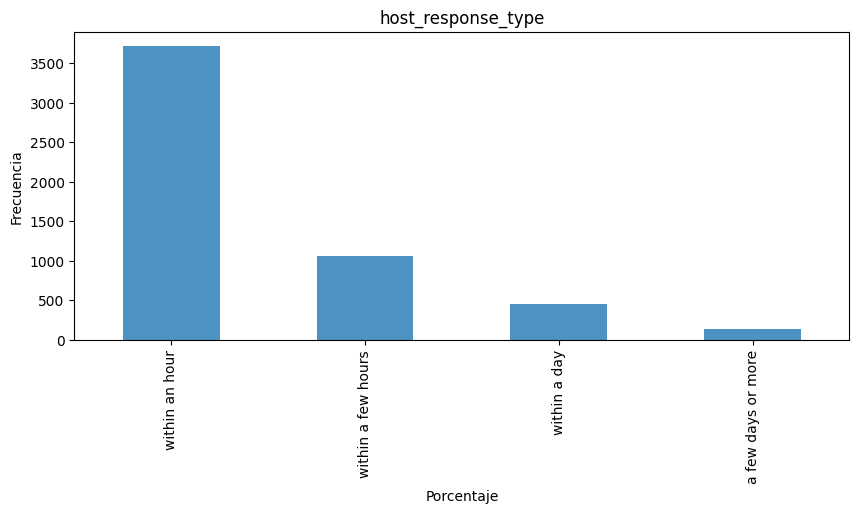

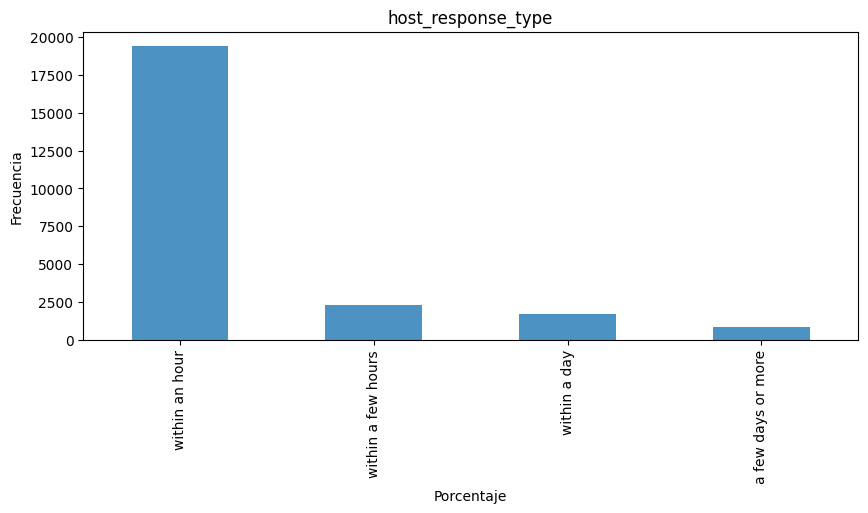

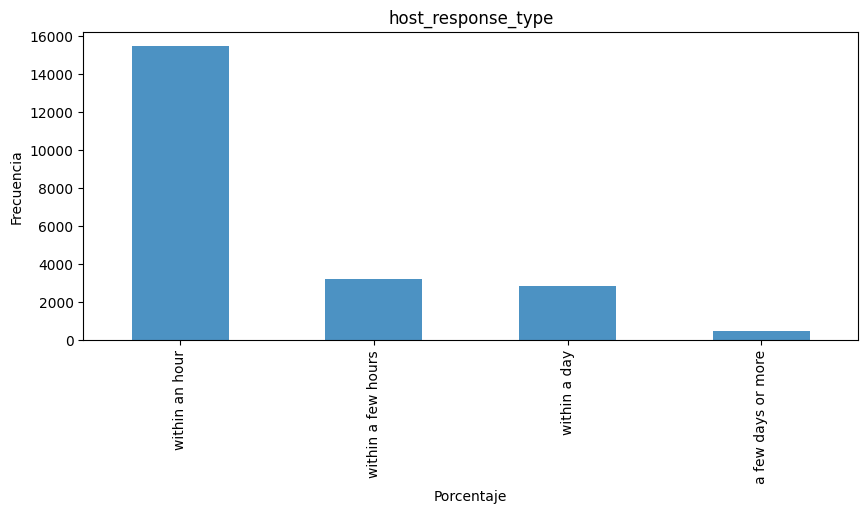

In [112]:
datasets = [tabla1_cal_index,tabla1_Df_index,tabla1_gir_index]

for i in datasets:
  i['frequency'].plot(kind='bar', figsize=(10,4),alpha = 0.8)
  plt.title('host_response_type')
  plt.xlabel('Porcentaje')
  plt.xticks(rotation = 90)
  plt.ylabel('Frecuencia')
  plt.show()

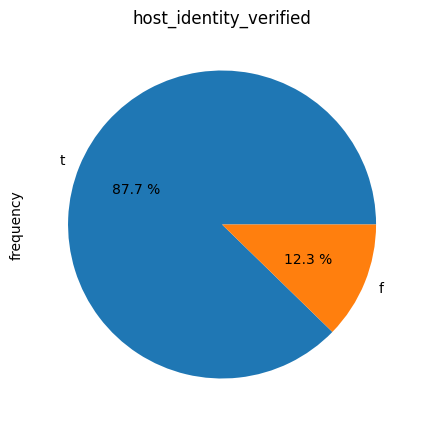

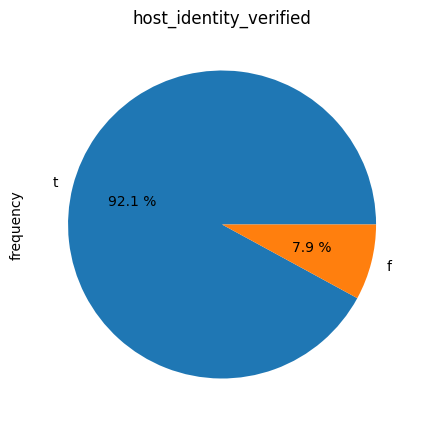

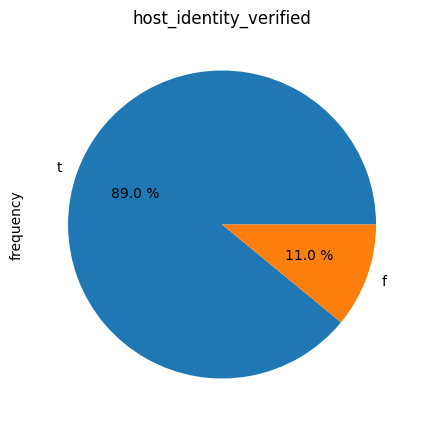

In [113]:
datasets = [tabla2_cal_index,tabla2_Df_index,tabla2_gir_index]

for i in datasets:
  i['frequency'].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")
  plt.title('host_identity_verified')
  plt.show()

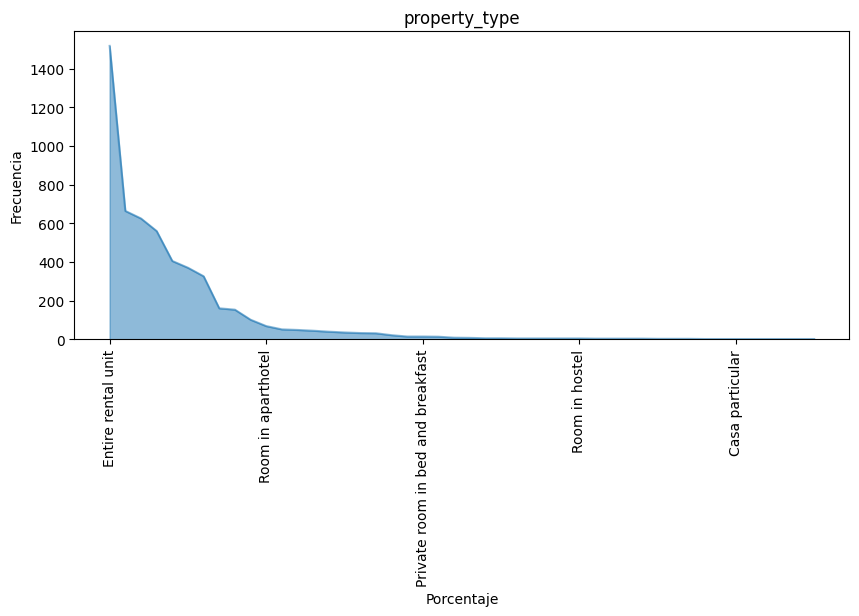

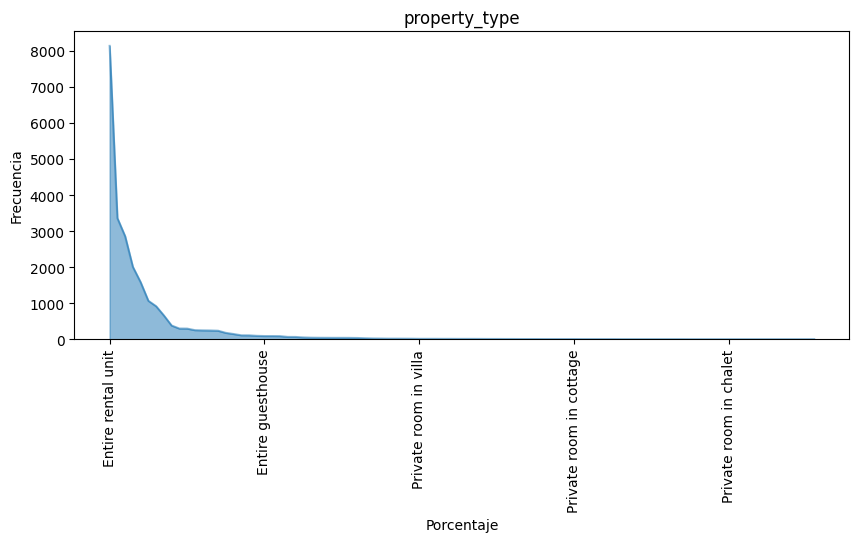

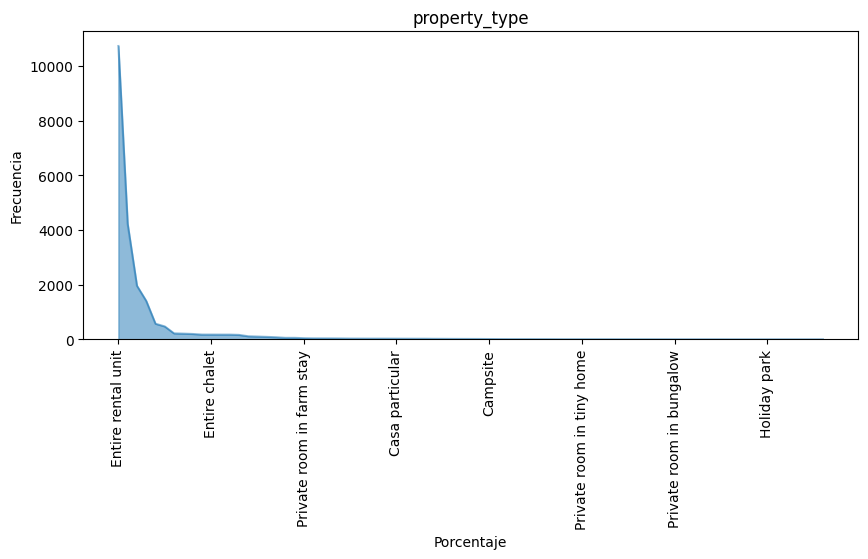

In [114]:
datasets = [tabla3_cal_index,tabla3_Df_index,tabla3_gir_index]

for i in datasets:
  i['frequency'].plot(kind='area', figsize=(10,4),alpha = 0.5)
  plt.title('property_type')
  plt.xlabel('Porcentaje')
  plt.xticks(rotation = 90)
  plt.ylabel('Frecuencia')
  plt.show()


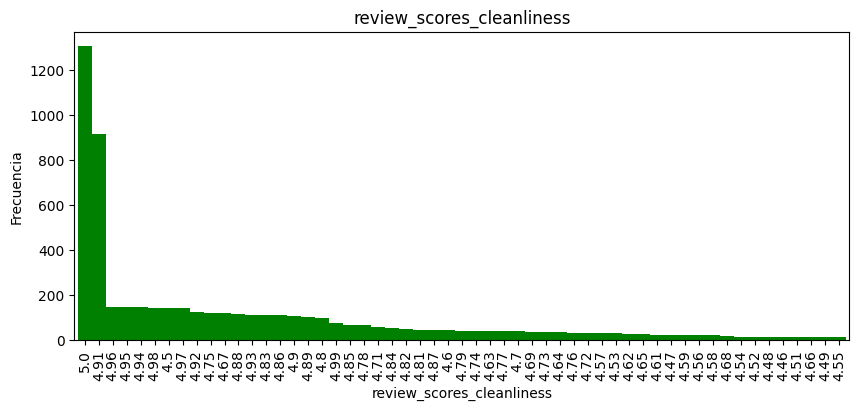

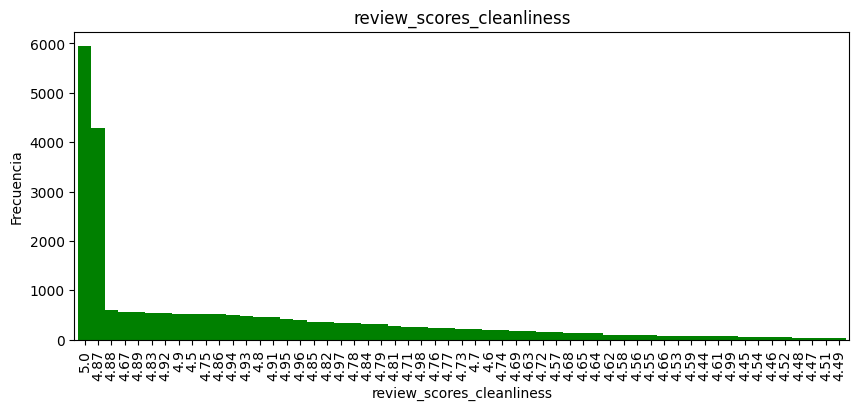

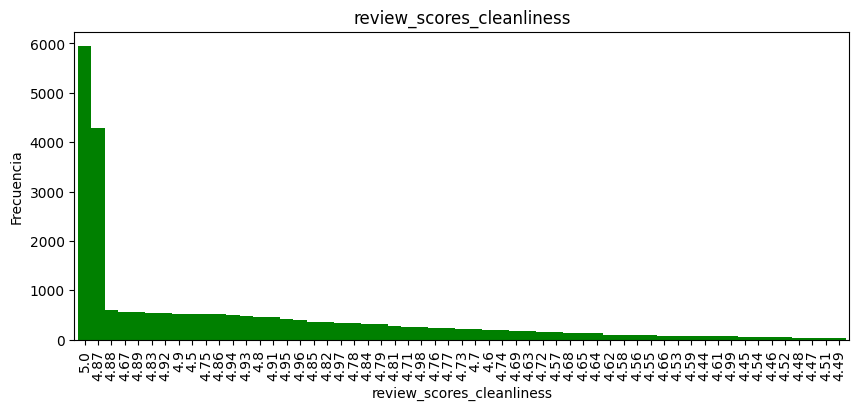

In [115]:
datasets = [tabla4_cal,tabla4_Df,tabla4_gir]

for i in datasets:
  i.plot(kind = 'bar', width=1, figsize=(10,4), color= 'green')
  plt.title('review_scores_cleanliness')
  plt.xlabel('review_scores_cleanliness')
  plt.ylabel('Frecuencia')
  plt.show()

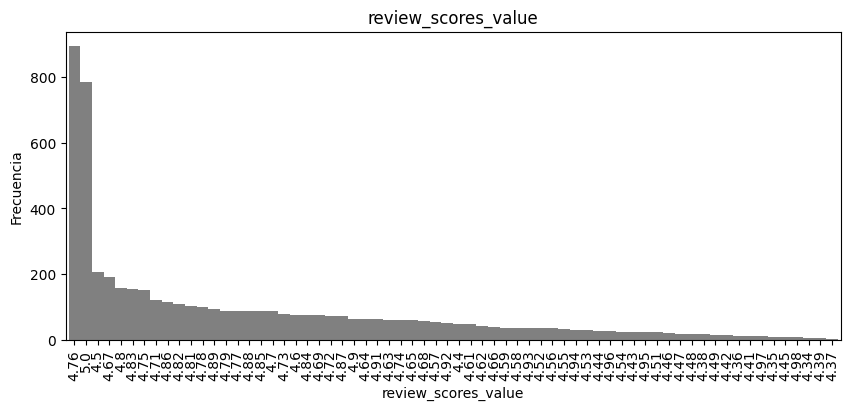

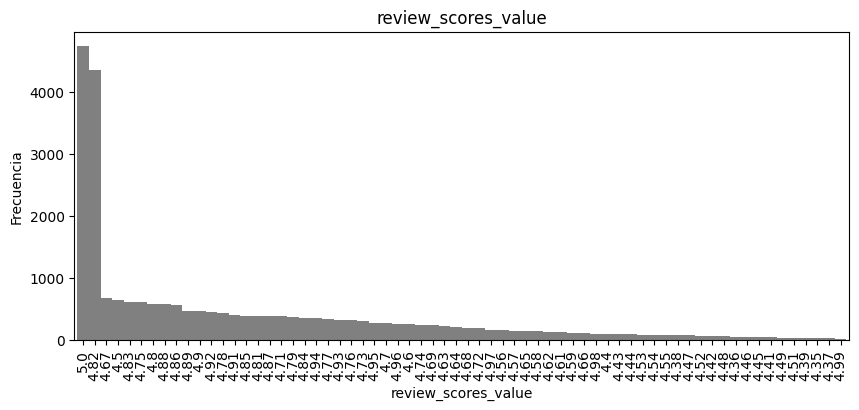

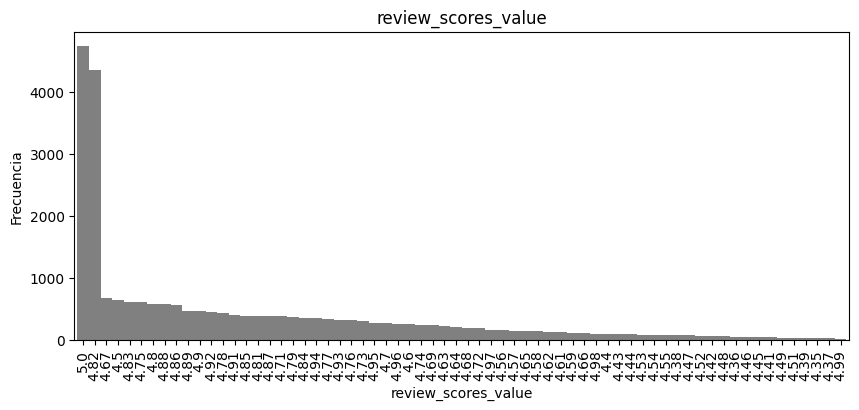

In [116]:
datasets = [tabla5_cal,tabla5_Df,tabla5_gir]

for i in datasets:
  i.plot(kind = 'bar', width=1, figsize=(10,4), color= 'grey')
  plt.title('review_scores_value')
  plt.xlabel('review_scores_value')
  plt.ylabel('Frecuencia')
  plt.show()

In [117]:
filtro1_cal.to_csv("filtro1_cal.csv")
filtro2_cal.to_csv("filtro2_cal.csv")
filtro3_cal.to_csv("filtro3_cal.csv")
filtro4_cal.to_csv("filtro4_cal.csv")
filtro5_cal.to_csv("filtro5_cal.csv")
filtro6_cal.to_csv("filtro6_cal.csv")
filtro7_cal.to_csv("filtro7_cal.csv")
filtro8_cal.to_csv("filtro8_cal.csv")
filtro9_cal.to_csv("filtro9_cal.csv")
filtro10_cal.to_csv("filtro10_cal.csv")
filtro1_df.to_csv("filtro1_df.csv")
filtro2_df.to_csv("filtro2_df.csv")
filtro3_df.to_csv("filtro3_df.csv")
filtro4_df.to_csv("filtro4_df.csv")
filtro5_df.to_csv("filtro5_df.csv")
filtro6_df.to_csv("filtro6_df.csv")
filtro7_df.to_csv("filtro7_df.csv")
filtro8_df.to_csv("filtro8_df.csv")
filtro9_df.to_csv("filtro9_df.csv")
filtro10_df.to_csv("filtro10_df.csv")
filtro1_gir.to_csv("filtro1_gir.csv")
filtro2_gir.to_csv("filtro2_gir.csv")
filtro3_gir.to_csv("filtro3_gir.csv")
filtro4_gir.to_csv("filtro4_gir.csv")
filtro5_gir.to_csv("filtro5_gir.csv")
filtro6_gir.to_csv("filtro6_gir.csv")
filtro7_gir.to_csv("filtro7_gir.csv")
filtro8_gir.to_csv("filtro8_gir.csv")
filtro9_gir.to_csv("filtro9_gir.csv")
filtro10_gir.to_csv("filtro10_gir.csv")

from google.colab import files 
files.download("filtro1_cal.csv")
files.download("filtro2_cal.csv")
files.download("filtro3_cal.csv")
files.download("filtro4_cal.csv")
files.download("filtro5_cal.csv")
files.download("filtro6_cal.csv")
files.download("filtro7_cal.csv")
files.download("filtro8_cal.csv")
files.download("filtro9_cal.csv")
files.download("filtro10_cal.csv")
files.download("filtro1_df.csv")
files.download("filtro2_df.csv")
files.download("filtro3_df.csv")
files.download("filtro4_df.csv")
files.download("filtro5_df.csv")
files.download("filtro6_df.csv")
files.download("filtro7_df.csv")
files.download("filtro8_df.csv")
files.download("filtro9_df.csv")
files.download("filtro10_df.csv")
files.download("filtro1_gir.csv")
files.download("filtro2_gir.csv")
files.download("filtro3_gir.csv")
files.download("filtro4_gir.csv")
files.download("filtro5_gir.csv")
files.download("filtro6_gir.csv")
files.download("filtro7_gir.csv")
files.download("filtro8_gir.csv")
files.download("filtro9_gir.csv")
files.download("filtro10_gir.csv")

'\nfiltro1_cal.to_csv("filtro1_cal.csv")\nfiltro2_cal.to_csv("filtro2_cal.csv")\nfiltro3_cal.to_csv("filtro3_cal.csv")\nfiltro4_cal.to_csv("filtro4_cal.csv")\nfiltro5_cal.to_csv("filtro5_cal.csv")\nfiltro6_cal.to_csv("filtro6_cal.csv")\nfiltro7_cal.to_csv("filtro7_cal.csv")\nfiltro8_cal.to_csv("filtro8_cal.csv")\nfiltro9_cal.to_csv("filtro9_cal.csv")\nfiltro10_cal.to_csv("filtro10_cal.csv")\nfiltro1_df.to_csv("filtro1_df.csv")\nfiltro2_df.to_csv("filtro2_df.csv")\nfiltro3_df.to_csv("filtro3_df.csv")\nfiltro4_df.to_csv("filtro4_df.csv")\nfiltro5_df.to_csv("filtro5_df.csv")\nfiltro6_df.to_csv("filtro6_df.csv")\nfiltro7_df.to_csv("filtro7_df.csv")\nfiltro8_df.to_csv("filtro8_df.csv")\nfiltro9_df.to_csv("filtro9_df.csv")\nfiltro10_df.to_csv("filtro10_df.csv")\nfiltro1_gir.to_csv("filtro1_gir.csv")\nfiltro2_gir.to_csv("filtro2_gir.csv")\nfiltro3_gir.to_csv("filtro3_gir.csv")\nfiltro4_gir.to_csv("filtro4_gir.csv")\nfiltro5_gir.to_csv("filtro5_gir.csv")\nfiltro6_gir.to_csv("filtro6_gir.csv")\